# Digit Recognizer
- 코드 작성 일자 : 2020-08-17
- 목표 : accuracy over than98%

- 데이터 설명:
    - 내 생각에는 단순 MNIST 데이터로 보인다.
    
## 결론
- 0.99192 accuracy로 목표는 달성하였으나 상위 33%로 좋지 않은 성적을 보였다.
    - https://www.kaggle.com/hyunho95/competitions

## Import data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
train_data = pd.read_csv('data/digit-recognizer/train.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = (train_data[train_data.columns[1:]].values/255.).reshape(-1,28,28,1)
y = train_data['label'].values

In [51]:
X.shape

(42000, 28, 28, 1)

Below is image of index 1.  
It is zero and this data is MNIST data.

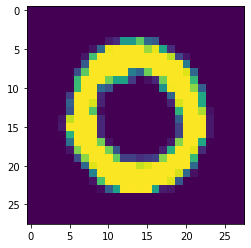

In [53]:
plt.imshow(X[1,:,:,0])

## Make CNN

In [54]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size = 3, padding='same'),
#     keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Conv2D(32, kernel_size = 3, padding='same'),
#     keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, kernel_size = 5, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, kernel_size=3, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, kernel_size=3, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Conv2D(128, kernel_size=7, strides=2, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(.2),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(.2),
    keras.layers.Dense(10, activation='softmax')
])

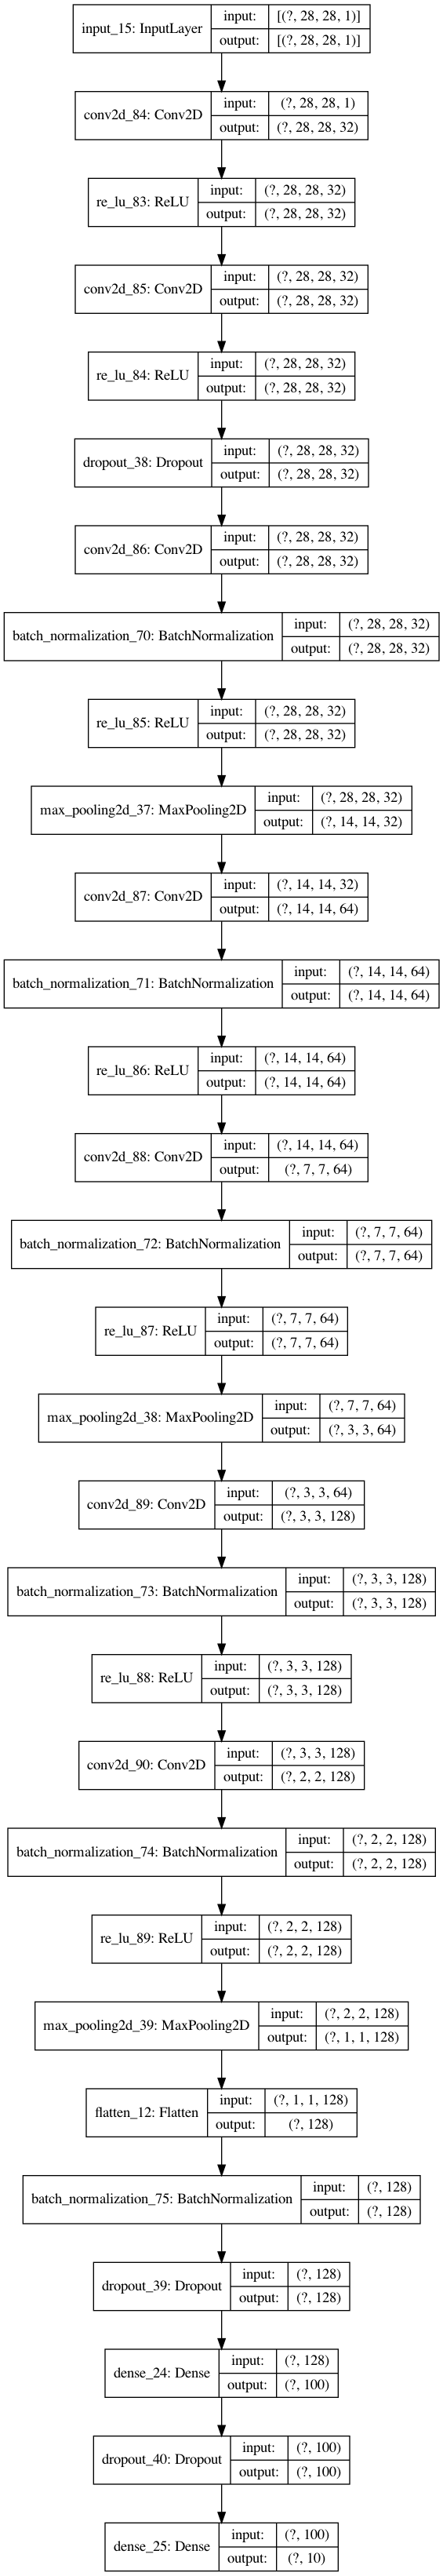

In [55]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [56]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
annealer = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.995 ** x)
checkpoint_cb = keras.callbacks.ModelCheckpoint('myModel_test.h5', save_best_only=True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [58]:
hitory = model.fit(X, y, epochs=10000,callbacks=[annealer, checkpoint_cb, earlystopping_cb], validation_split=.2)

Epoch 1/10000
1050/1050 [==============================] - 135s 128ms/step - loss: 0.1601 - accuracy: 0.9505 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 2/10000
1050/1050 [==============================] - 129s 123ms/step - loss: 0.0713 - accuracy: 0.9789 - val_loss: 0.0576 - val_accuracy: 0.9840
Epoch 3/10000
1050/1050 [==============================] - 128s 122ms/step - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0595 - val_accuracy: 0.9829
Epoch 4/10000
1050/1050 [==============================] - 129s 123ms/step - loss: 0.0442 - accuracy: 0.9867 - val_loss: 0.0520 - val_accuracy: 0.9865
Epoch 5/10000
1050/1050 [==============================] - 129s 123ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0552 - val_accuracy: 0.9874
Epoch 6/10000
1050/1050 [==============================] - 130s 124ms/step - loss: 0.0360 - accuracy: 0.9892 - val_loss: 0.0721 - val_accuracy: 0.9820
Epoch 7/10000
1050/1050 [==============================] - 130s 124ms/step - loss: 0.0327 - ac

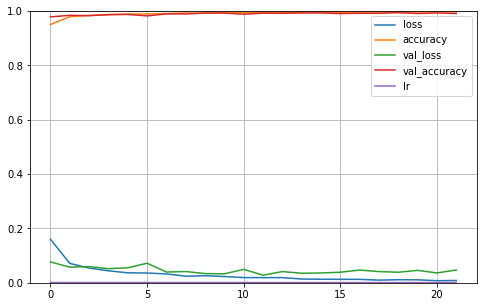

In [60]:
import pandas as pd

pd.DataFrame(hitory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


## Test dataset

In [61]:
test_dataset = pd.read_csv('data/digit-recognizer/test.csv')

In [62]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
test_set = (test_dataset.values/255.).reshape(-1,28,28,1)

In [64]:
test_set.shape

(28000, 28, 28, 1)

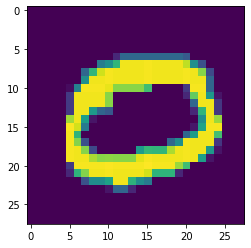

In [71]:
plt.imshow(test_set[1,:,:,0])

In [66]:
y_pred = model.predict(test_set)

In [68]:
y_pred.argmax(axis=1)

array([2, 0, 9, ..., 3, 9, 2])

In [72]:
submission = pd.read_csv('data/digit-recognizer/sample_submission.csv')

In [74]:
submission['Label'] = y_pred.argmax(axis=1)

In [75]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [76]:
submission.to_csv('result_digit_recognizer.csv', index=False)